<a href="https://colab.research.google.com/github/pascal-maker/Python/blob/master/Labo_05_Correlatie_Lineaire_Regressie_opdracht.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style="color:darkorange"> Correlatie & lineaire regressie opdracht - League of legends
<img src="Lol.jpg">

</br>
</br>



<img src="League of legends.jpg">

Voor een korte uitleg over League of Legends bekijk dit [youtube filmpje](https://www.youtube.com/watch?v=BGtROJeMPeE&feature=youtu.be)

Het bestand 'LoL_team_stats.csv' bevat:

| Variable Name |Description |
| --- | --- |
|kills	|number of kills by the entire team (numeric)|
|deaths|	number of deaths in the entire team (numeric)|
|assists|	 number of assists by the entire team (numeric)|
|killingsprees  |	amount of killing sprees of the entire team (numeric)|
|double kills|	amount of double kills by the entire team (numeric)|
|tripple kills|	amount of tripple kills by the entire team (numeric)|
|totdmgdealt|	total damage dealt by the entire team (numeric)|
|totdmgtochamp	| total damage dealt by the entire team to enemy champions (numeric) |
|totheal |	total amount of damage healed by the entire team (numeric)|
|totunitshealed |	total amount of units healed by the entire team (numeric|
|dmgtoobj |	total damage to objectives(turret, nexus, inhibitor) by the entire team|
|dmgtoturrets |	total damage to turrets (numeric)|
|visionscore |	total vision score by the entire team(numeric)|
|totdmgtaken |	total damage taken by the entire team (numeric)|
|goldearned |	total amount of gold earned by the entire team(numeric)|
|goldspent  |	total amount of gold spent by the entire team(numeric)|
|turretkills |	number of turretkills by the entire team (numeric)|
|inhibkills | number of turretkills by the entire team (numeric)|
|totminionskilled | number of minions killed by the entire team(numeric)|
|neutralminionskilled | number of minions killed in the jungle (numeric)|
|totcctimedealt | total crowd control time (ability to directly hinder a unit's ability to fight e.g. a stun) dealt (numeric)|
|pinksbought| number of vision wards bought (https://leagueoflegends.fandom.com/wiki/Vision_Ward) (numeric)|
|wardsbought| numer of wards bought (numeric)|
|wardsplaced| number of wards placed (numeric)|
|wardskilled | number of wards killed (numeric)|
|largestkillingspree| the largest killing spree of the team (numeric)|
|largestmultikill | largest multi kill of the team (numeric)|
|largestcrit| largest critical strike of the team (numeric)|
|ownjunglekills| amount of own jungle kills (numeric)|
|enemyjunglekills| amount of enemy jungle kills (numeric) |
|win | Wheter the team won or lost (binary: 0:Loss, 1: Win) |


Deze statistieken zijn afkomstig van teams die aan "the red side" spelen

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import style
import seaborn as sns
from sklearn import datasets, linear_model
pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)
import warnings
warnings.filterwarnings("ignore")

import scipy
import scipy.stats

In [ ]:
dataset = pd.read_csv('LoL_team_stats.csv')
dataset.head()

,kills,deaths,assists,killingsprees,doublekills,triplekills,totdmgdealt,totdmgtochamp,totheal,totunitshealed,dmgtoobj,dmgtoturrets,visionscore,totdmgtaken,goldearned,goldspent,turretkills,inhibkills,totminionskilled,neutralminionskilled,totcctimedealt,pinksbought,wardsbought,wardsplaced,wardskilled,largestkillingspree,largestmultikill,largestcrit,ownjunglekills,enemyjunglekills,win
0,39,20,56,9,1,0,693679,104497,22618,8,66422,23578,138,94699,67965,63133,8,2,661,132,1735,7,0,54,10,12,2,843,81,30,1
1,32,20,41,7,3,1,436371,69090,13829,11,40373,27746,80,72978,53872,44493,6,2,499,87,1137,2,0,41,5,6,3,1211,41,28,1
2,33,39,45,10,2,1,671974,110564,49455,7,47074,15259,116,166427,68135,57945,6,0,759,114,2137,0,0,69,1,4,3,486,51,48,1
3,45,28,70,10,4,0,478826,90721,23158,12,63302,21778,115,117501,62032,54033,7,1,568,57,1312,3,0,49,5,8,2,817,19,25,1
4,39,32,52,12,1,0,584743,116459,28432,12,36481,24004,78,122907,65539,57500,7,4,665,101,2007,5,0,49,6,5,2,1686,53,34,1


In [ ]:
dataset.shape

(47581, 31)

#### <span style="color:deeppink"> Hoeveel spellen werden er gewonnen en hoeveel spellen werden er verloren? Visualiseer dit aan de hand van de gepaste grafiek en bereken de percentages gewonnen en verloren spellen. </span>

Gewonnen spellen : 22667
Verloren spellen : 24914
Percentage winst : 47.64%
Percentage verlies: 52.36%


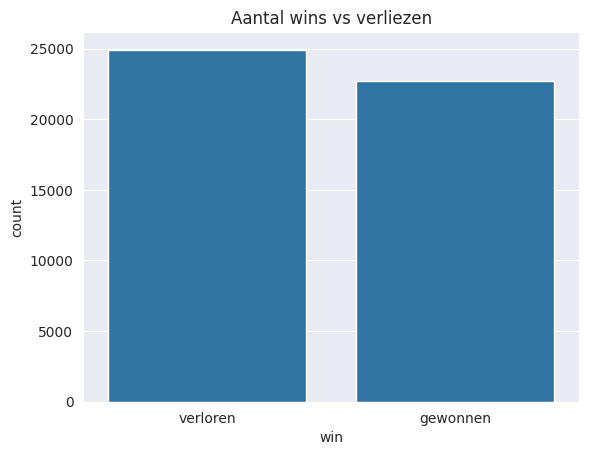

In [39]:
wins = dataset['win'].value_counts()
pct  = dataset['win'].value_counts(normalize=True) * 100

print(f"Gewonnen spellen : {wins[1]}")
print(f"Verloren spellen : {wins[0]}")
print(f"Percentage winst : {pct[1]:.2f}%")
print(f"Percentage verlies: {pct[0]:.2f}%")

sns.countplot(x='win', data=dataset, order=[0,1])
plt.title('Aantal wins vs verliezen')
plt.xticks([0,1], ['verloren','gewonnen'])
plt.show()


 het aantal gewonnen spelletjes zijn 22667
 het aantal verloren spel zijn 24914
 het percentage van gewonnen spelletjes is 47.64%
 het percentage van verloren spelletjes is 52.36%


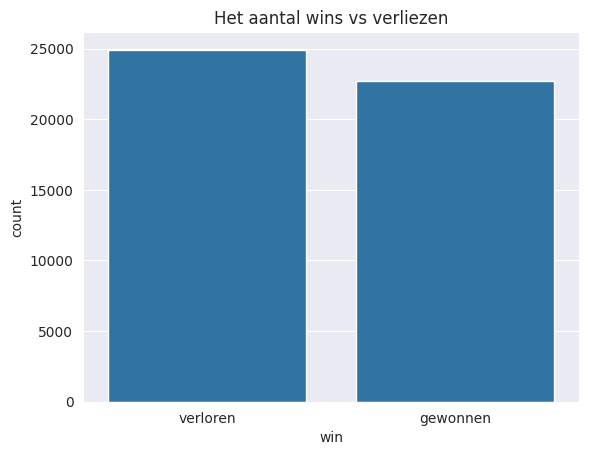

In [46]:
win = dataset[dataset.win==1]
loss = dataset[dataset.win==0]

print(f" het aantal gewonnen spelletjes zijn {len(win)}")
print(f" het aantal verloren spel zijn {len(loss)}")
print(f" het percentage van gewonnen spelletjes is {round(len(win)/len(dataset)*100,2)}%")
print(f" het percentage van verloren spelletjes is {round(len(loss)/len(dataset)*100,2)}%")

sns.countplot(x='win', data=dataset)
plt.title('Het aantal wins vs verliezen')
plt.xticks([0,1],['verloren','gewonnen'])
plt.show() #ditisminnversie

#### <span style="color:deeppink"> Welke kolom heeft de grootste negatieve impact op een win? En welke de grootste positieve impact?


In [40]:
# haal alleen de correlaties met 'win' op
corr_win = correlatiecoefficienten['win'].sort_values()

negatief = corr_win.idxmin()   # label met kleinste r
positief = corr_win.idxmax()   # label met grootste r

print(f"Grootste negatieve correlatie: {negatief}  (r = {corr_win.min():.3f})")
print(f"Grootste positieve correlatie: {positief}  (r = {corr_win.max():.3f})")


Grootste negatieve correlatie: deaths  (r = -0.469)
Grootste positieve correlatie: win  (r = 1.000)


Waarom?

dataset.corr() geeft een hele matrix; daar kun je niet direct de “grootste negatieve” kolom uit halen zonder eerst te focussen op de rij/kolom win.

Met sort_values() zie je in één oogopslag van sterk negatief → sterk positief.

Tip: gebruik vanaf pandas 2.0 de extra optie numeric_only=True om een FutureWarning te vermijden:

python
Copy
Edit
correlatiecoefficienten = dataset.corr(numeric_only=True)
Kortom: je eerste stap is goed, maar voeg het selecteren & sorteren toe om het antwoord daadwerkelijk te krijgen.

Text(0.5, 1.0, 'heatmap dataset')

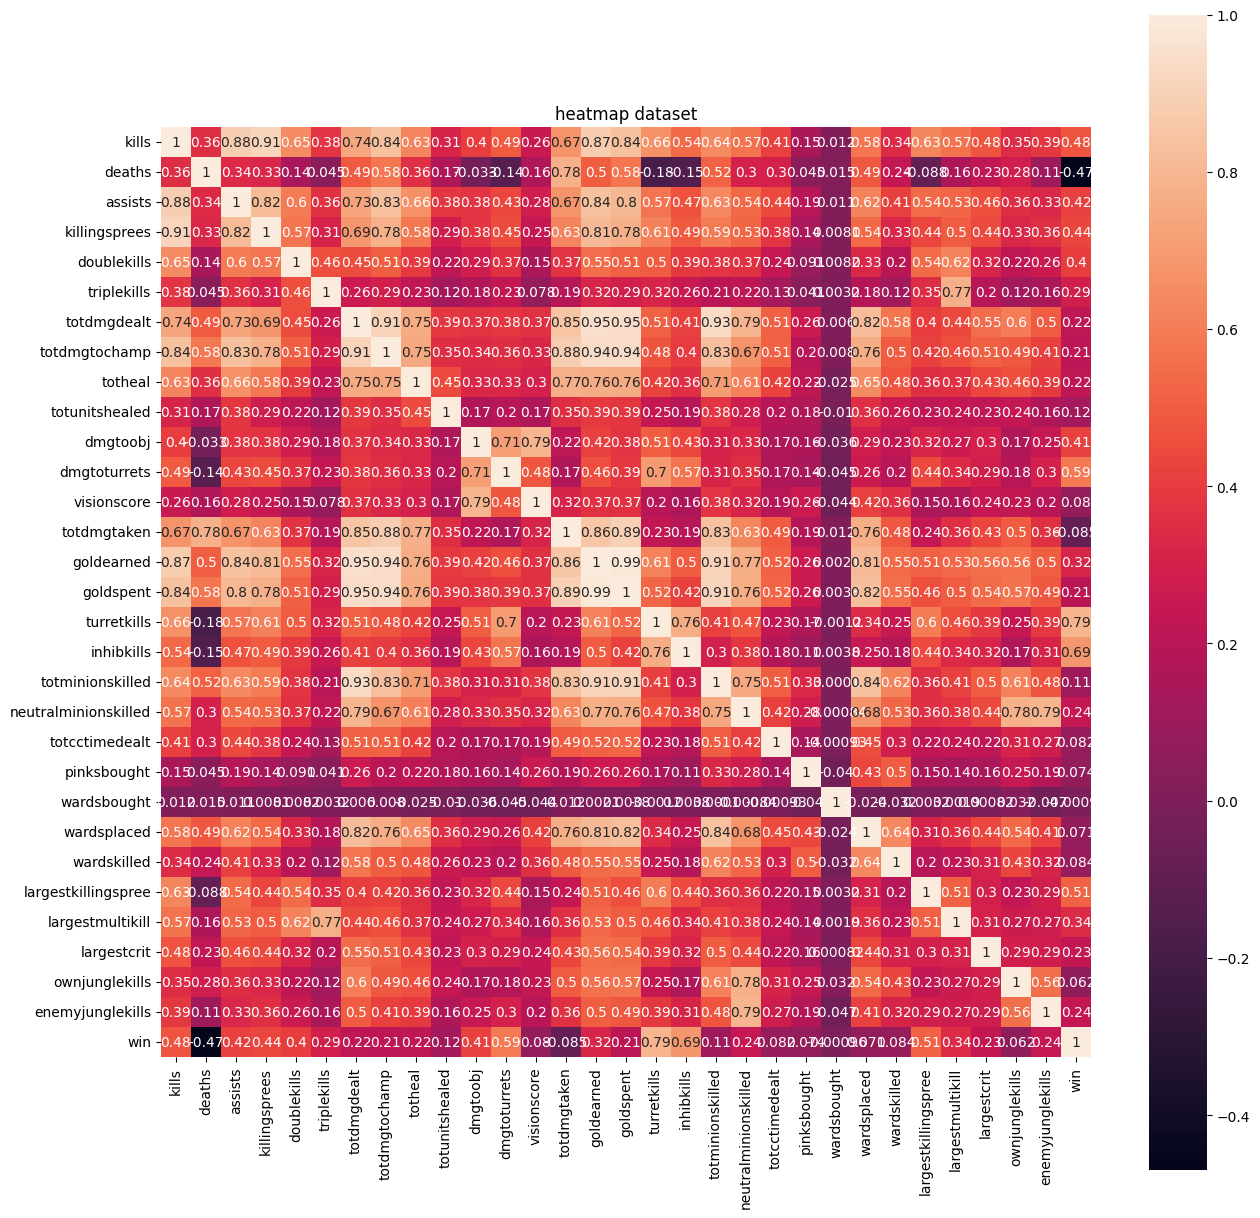

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(data=correlatiecoefficienten,square=True,annot=True)
plt.title("heatmap dataset")

de grootste negatieve impact is deaths en de grootste positieve impact is turretkills

#### <span style="color:deeppink"> Bepaal de correlatie tussen de volgende kolommen:

| kolom 1 | kolom 2 |
| --- | --- |
|total damage dealt	| total minions killed |
|wards placed |	total damage dealt |
|total damage taken	| total healed |
|gold spent |	total damage taken |
|gold spent |	total damage dealt |
|gold spent |	total healed |

In [42]:
from scipy.stats import pearsonr   # levert (r, p) terug

# lijst met (kolom1, kolom2)
paren = [
    ("totdmgdealt", "totminionskilled"),  # total damage dealt vs total minions killed
    ("wardsplaced", "totdmgdealt"),       # wards placed vs total damage dealt
    ("totdmgtaken", "totheal"),           # total damage taken vs total healed
    ("goldspent",   "totdmgtaken"),       # gold spent vs total damage taken
    ("goldspent",   "totdmgdealt"),       # gold spent vs total damage dealt
    ("goldspent",   "totheal"),           # gold spent vs total healed
]

print("Correlaties (Pearson r):")
for x, y in paren:
    r, p = pearsonr(dataset[x], dataset[y])
    print(f"{x:<15s}  vs  {y:<15s}  →  r = {r:6.3f}  (p = {p:.3e})")


Correlaties (Pearson r):
totdmgdealt      vs  totminionskilled  →  r =  0.932  (p = 0.000e+00)
wardsplaced      vs  totdmgdealt      →  r =  0.818  (p = 0.000e+00)
totdmgtaken      vs  totheal          →  r =  0.772  (p = 0.000e+00)
goldspent        vs  totdmgtaken      →  r =  0.892  (p = 0.000e+00)
goldspent        vs  totdmgdealt      →  r =  0.946  (p = 0.000e+00)
goldspent        vs  totheal          →  r =  0.756  (p = 0.000e+00)


2  Zes specifieke correlaties
Je gebruikte np.corrcoef, wat prima de r‑waarde oplevert, maar:

corrcoef geeft een 2×2‑matrix terug. Je print nu de hele matrix; voor leesbaarheid wil je eigenlijk alleen matrix[0,1].

Je herhaalt bijna identieke code zes keer. dit maakt het efficienter

In [ ]:
corr = np.corrcoef(dataset['totdmgdealt'],dataset['totminionskilled'])
print(corr)

[[1.         0.93184347]
 [0.93184347 1.        ]]


In [ ]:
correlatieward = np.corrcoef(dataset['wardsplaced'],dataset['totdmgdealt'])
print(correlatieward)

[[1.        0.8175628]
 [0.8175628 1.       ]]


In [ ]:
correlatiedamage = np.corrcoef(dataset['totdmgtaken'],dataset['totheal'])
print(correlatiedamage)

[[1.         0.77194402]
 [0.77194402 1.        ]]


In [ ]:
correlatiegold = np.corrcoef(dataset['goldspent'],dataset['totdmgtaken'])
print(correlatiegold)

[[1.         0.89245797]
 [0.89245797 1.        ]]


In [ ]:
correlatiegoldspent = np.corrcoef(dataset['goldspent'],dataset['totdmgdealt'])
print(correlatiegoldspent)

[[1.         0.94589688]
 [0.94589688 1.        ]]


In [ ]:
correlatiegoldheal = np.corrcoef(dataset['goldspent'],dataset['totheal'])
print(correlatiegoldheal)

[[1.        0.7564626]
 [0.7564626 1.       ]]


#### <span style="color:deeppink"> Bepaal de regressielijn tussen de kills & de total damage to champs

In [ ]:
def plot_regressionline(dataset: pd.DataFrame, x: str, y:str, regressielijn: LinearRegression, title:str) -> None:
    plt.figure()
    sns.scatterplot(x=dataset[x], y=dataset[y], data=dataset,color='orange',s=100)
    sns.lineplot(x=dataset[x],y=regressielijn.predict(dataset[x].values.reshape(-1,1)),color='violet',linewidth=3) # Pass x and y as keyword arguments
    sns.set_style("darkgrid")
    plt.title(title)
    plt.show()

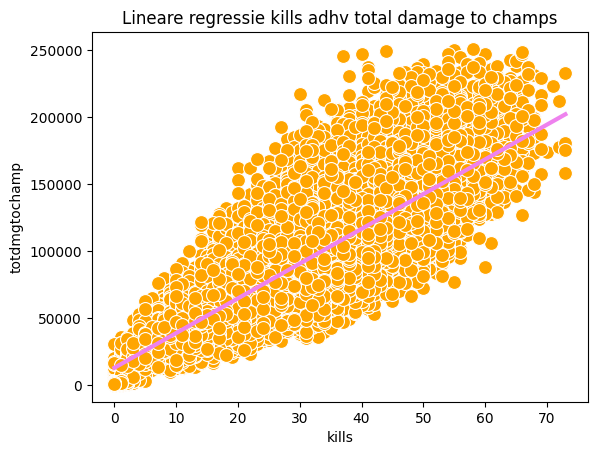

In [ ]:
regressielijn = find_regressionline(dataset,'kills','totdmgtochamp')
plot_regressionline(dataset,'kills','totdmgtochamp',regressielijn,'Lineare regressie kills adhv total damage to champs')

Probeer de total damage to champs te voorspellen als er 12 kills zijn.

In [ ]:
x_value = np.array([[12]])
totaldamagetochamps= regressielijn.predict(x_value)
print('De voorspelde total damage to champs bedraagt: ',totaldamagetochamps[0])


De voorspelde total damage to champs bedraagt:  43910.063605274656


Indien je de outliers verwijdert uit de dataset, resulteert dit in een betere voorspelling?

In [ ]:
outliers = dataset[(np.abs(scipy.stats.zscore(dataset)) < 3).all(axis=1)]
print(outliers)


       kills  deaths  assists  killingsprees  doublekills  triplekills  \
0         39      20       56              9            1            0   
1         32      20       41              7            3            1   
2         33      39       45             10            2            1   
3         45      28       70             10            4            0   
4         39      32       52             12            1            0   
...      ...     ...      ...            ...          ...          ...   
47576     11      30       11              3            0            0   
47577     20      46       29              5            1            0   
47578     37      29       41             10            1            1   
47579     51      34       62             11            2            0   
47580     34      22       39              8            2            1   

       totdmgdealt  totdmgtochamp  totheal  totunitshealed  dmgtoobj  \
0           693679         104497    22

In [ ]:
remove_outliers = dataset[(np.abs(scipy.stats.zscore(dataset)) < 3).all(axis=1)]
regressielijn = find_regressionline(remove_outliers,'kills','totdmgtochamp')

Probeer de total damage taken te voorspellen als er 12 deaths zijn gevallen.

In [ ]:
totaldamagetaken = regressielijn.predict([[12]])
print('De voorspelde total damage taken bedraagt: ',totaldamagetaken[0])

De voorspelde total damage taken bedraagt:  46233.940258112045


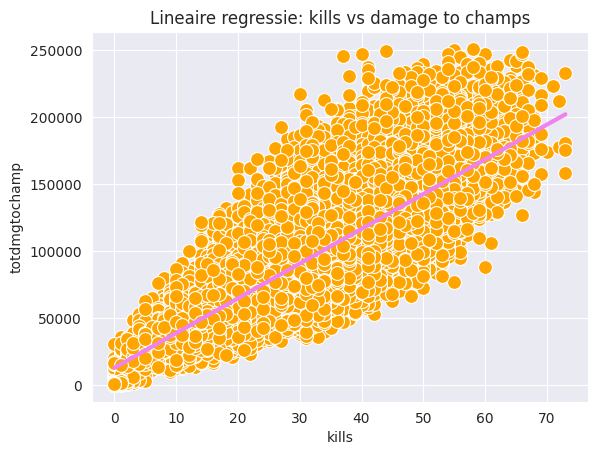

R² (volledige set) = 0.704
Voorspelde champ‑damage bij 12 kills: 43,910
Rows vóór: 47581, ná Z<3 filter: 94877
R² (zonder outliers) = 0.703
Voorspelde damage bij 12 kills (clean): 44,144
R² (deaths → taken‑damage) = 0.604
Voorspelde taken‑damage bij 12 deaths: 66,514


In [48]:
# 1. Regressielijn kills → damage to champs
import scipy.stats as stats
model_kd = find_regressionline(dataset, 'kills', 'totdmgtochamp')
plot_regressionline(dataset, 'kills', 'totdmgtochamp',
                    model_kd, 'Lineaire regressie: kills vs damage to champs')
print(f"R² (volledige set) = {model_kd.score(dataset[['kills']], dataset['totdmgtochamp']):.3f}")

# 2. Voorspelling bij 12 kills
pred_12 = model_kd.predict([[12]])[0]
print(f"Voorspelde champ‑damage bij 12 kills: {pred_12:,.0f}")

# 3. Outliers verwijderen (alleen kolommen kills & damage)
clean = dataset[np.abs(stats.zscore(dataset[['kills','totdmgtochamp']])) < 3].dropna()
print(f"Rows vóór: {len(dataset)}, ná Z<3 filter: {len(clean)}")

model_kd_clean = find_regressionline(clean, 'kills', 'totdmgtochamp')
print(f"R² (zonder outliers) = {model_kd_clean.score(clean[['kills']], clean['totdmgtochamp']):.3f}")
print(f"Voorspelde damage bij 12 kills (clean): {model_kd_clean.predict([[12]])[0]:,.0f}")

# 4. Nieuw model: deaths → total damage taken
model_dt = find_regressionline(dataset, 'deaths', 'totdmgtaken')
print(f"R² (deaths → taken‑damage) = {model_dt.score(dataset[['deaths']], dataset['totdmgtaken']):.3f}")
print(f"Voorspelde taken‑damage bij 12 deaths: {model_dt.predict([[12]])[0]:,.0f}")


Wat lost dit op?

Correcte modellen: één voor kills → champ‑damage, één voor deaths → taken‑damage.

Outlier‑filter beperkt zich tot de kolommen die die regressie beïnvloeden, en je krijgt een duidelijke rijen‑teller plus nieuwe R².

Geen megaprint van de hele DataFrame, alleen nuttige samenvattingen.

Zo beantwoord je de vraag “Geeft outliers verwijderen een betere voorspelling?” met concrete R²‑cijfers én gebruik je het juiste model voor elke voorspelling  Cel – Regressies, voorspellingen & outliers
Je doet drie dingen na elkaar — handig, maar er zitten een paar foutjes die de uitkomst vertekenen.

Stap	Wat je code nu doet	Waarom niet ideaal	Hoe fixen
1. Fit regressielijn op kills → totdmgtochamp en plot	✔️ Prima		(houden)
2. Voorspel champ‑damage bij 12 kills	✔️ Prima		(houden)
3. Outliers filteren met Z‑score over alle kolommen en de hele df printen	⇒ verwijdert rijen op basis van totaal‑Z; de naam outliers is verwarrend (het is juist de gefilterde set).
Printen van de volledige df = onleesbaar.	Filter alleen de twee relevante kolommen.
Geef een korte samenvatting (aantal rijen vóór/na).
4. Zelfde regressielijn gebruiken om tot damage taken bij 12 deaths te voorspellen	❌ Fout: het model is getraind op kills vs champ‑damage, niet op deaths vs taken‑damage.	Maak een nieuw model: deaths → totdmgtaken.

#### <span style="color:deeppink"> Bereken de regressielijn tussen gold earned en de damage to turrets

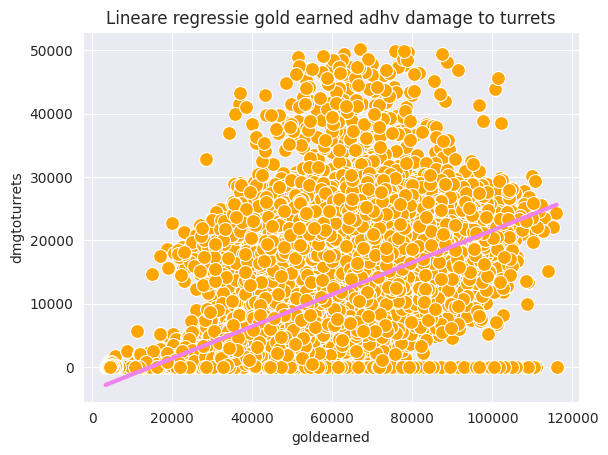

In [ ]:
regressielijn = find_regressionline(dataset,'goldearned','dmgtoturrets')
plot_regressionline(dataset,'goldearned','dmgtoturrets',regressielijn,'Lineare regressie gold earned adhv damage to turrets')

Heeft hier het verwijderen van de outliers enige invloed?
Bekijk de grafiek aandachtig, zijn er foutieve of onlogische waarden aanwezig in de dataset? Heeft het verwijderen van dit soort data een invloed op de voorspelling?

In [ ]:
remove_outliers = dataset[(np.abs(scipy.stats.zscore(dataset)) < 3).all(axis=1)]
regressielijn = find_regressionline(remove_outliers,'goldearned','dmgtoturrets')

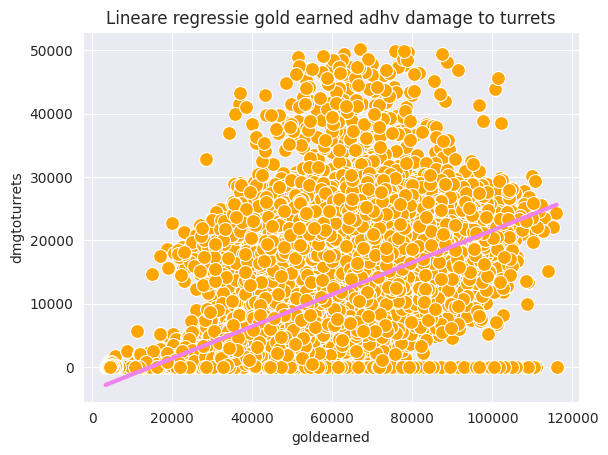

In [ ]:
regressielijn = find_regressionline(dataset,'goldearned','dmgtoturrets')
plot_regressionline(dataset,'goldearned','dmgtoturrets',regressielijn,'Lineare regressie gold earned adhv damage to turrets')

R² volledig: 0.209
Rows vóór: 47581, ná Z<3 filter: 95032
R² zonder outliers: 0.210


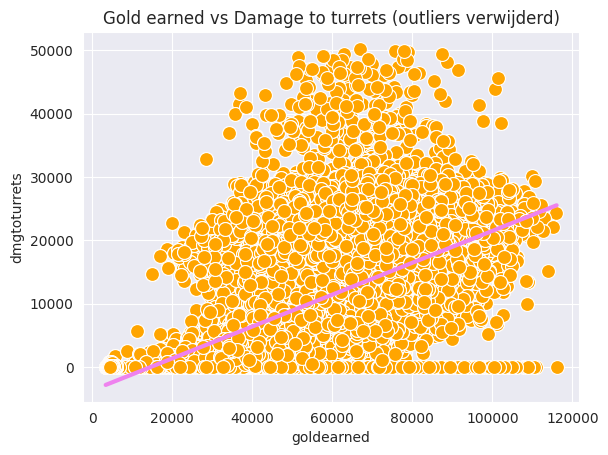

In [49]:
# 1. Model op de volledige dataset
mdl_full = find_regressionline(dataset, 'goldearned', 'dmgtoturrets')
r2_full  = mdl_full.score(dataset[['goldearned']], dataset['dmgtoturrets'])
print(f"R² volledig: {r2_full:.3f}")

# 2. Outliers verwijderen op kolommen 'goldearned' & 'dmgtoturrets'
clean = dataset[np.abs(stats.zscore(dataset[['goldearned','dmgtoturrets']])) < 3].dropna()
print(f"Rows vóór: {len(dataset)}, ná Z<3 filter: {len(clean)}")

# 3. Nieuw model op gefilterde set
mdl_clean = find_regressionline(clean, 'goldearned', 'dmgtoturrets')
r2_clean  = mdl_clean.score(clean[['goldearned']], clean['dmgtoturrets'])
print(f"R² zonder outliers: {r2_clean:.3f}")

# 4. Eén plot – bij voorkeur die van de gefilterde set
plot_regressie = clean  # of dataset, als je beide wilt vergelijken
plot_regressie_model = mdl_clean
plot_regressionline(plot_regressie, 'goldearned', 'dmgtoturrets',
                    plot_regressie_model,
                    'Gold earned vs Damage to turrets (outliers verwijderd)')


✔️ Wat is goed	💡 Verbeterpunten
Je traint een model voor gold earned → dmg to turrets en visualiseert het.	1️⃣ Je verwijdert outliers op basis van een Z‑score over alle kolommen. Dat kan onbedoeld veel rijen schrappen en heeft niks met de twee regressie‑kolommen te maken.
2️⃣ Je plot ná het outlier‑filter toch weer het oude model (volledige dataset) – daardoor zie je geen verschil.
3️⃣ Je toont geen R² vóór/na; zo kun je niet beoordelen of de voorspelling beter wordt.
—	Gebruik dezelfde aanpak als bij de vorige fix: filter alleen de twee relevante kolommen, rapporteer rijen‑teller en R², en plot één keer (bijv. de gefilterde fit). Wat lost dit op?

Gerichte outlier‑filter – alleen voor de variabelen die in deze regressie meespelen.

Heldere metingen – rij‑teller + R² vóór en na de filter tonen meteen of je model beter generaliseert.

Één duidelijke grafiek – de fit na schonen, zodat je visueel ziet of extreme punten weg zijn.

Met deze stap‐voor‐stap weergave kun je overtuigend beantwoorden of outliers de kwaliteit van de voorspelling beïnvloeden.

#### <span style="color:deeppink"> Bereken de regressielijn tussen kills & gold earned

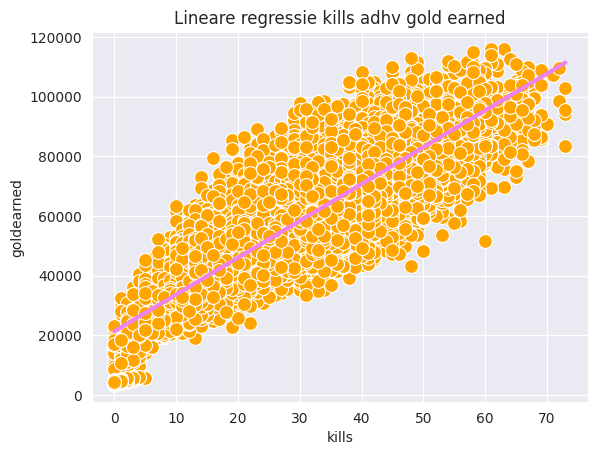

In [ ]:
regressielijn = find_regressionline(dataset,'kills','goldearned')
plot_regressionline(dataset,'kills','goldearned',regressielijn,'Lineare regressie kills adhv gold earned')

#### <span style="color:deeppink"> Kan je een betere voorspelling van total damage to champs aan de hand van het aantal kills doen indien je de winst of verlies in rekening brengt?

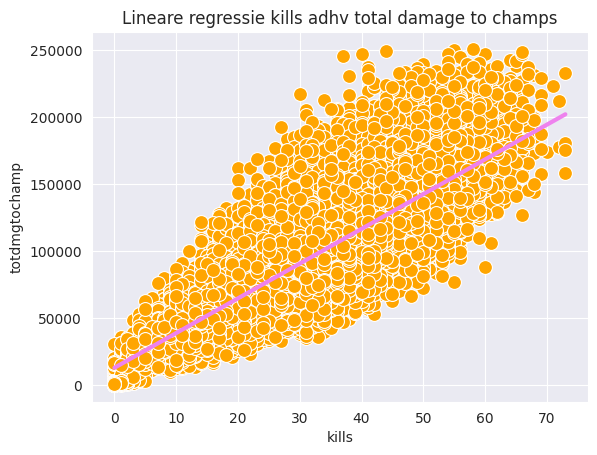

In [ ]:
kills = dataset['kills']
win = dataset['win']
killsandwin =  pd.DataFrame({'kills':kills,'win':win})
killsandwin.head()
regressielijn = find_regressionline(dataset,'kills','totdmgtochamp')
plot_regressionline(dataset,'kills','totdmgtochamp',regressielijn,'Lineare regressie kills adhv total damage to champs')


In [ ]:
winstenverliesinrekeningnemen = dataset[(dataset.win==1) | (dataset.win==0)]
regressielijn = find_regressionline(winstenverliesinrekeningnemen,'kills','totdmgtochamp')

Wat is de voorspelde total damage to champs bij 12 kills bij winst en verlies?

In [ ]:
voorspelling = regressielijn.predict([[12]])
print('De voorspelde total damage to champs bedraagt: ',voorspelling[0])

De voorspelde total damage to champs bedraagt:  43910.063605274656


#### <span style="color:deeppink"> Kan je een betere voorspelling van damage to turret doen aan de hand van gold earned indien je de winst of verlies in rekening brengt?  
Je mag outliers of foutieve waarden uit de dataset verwijderen.

In [ ]:
from os import remove
remove_outliers = dataset[(np.abs(scipy.stats.zscore(dataset)) < 3).all(axis=1)]
regressielijn = find_regressionline(remove_outliers,'goldearned','dmgtoturrets')

In [ ]:
winstenverliesinrekeningnemen = dataset[(dataset.win==1) | (dataset.win==0)]
regressielijn = find_regressionline(winstenverliesinrekeningnemen,'goldearned','dmgtoturrets')

In [50]:
# 1. Kills → gold earned (basis)
mdl_kg = find_regressionline(dataset, 'kills', 'goldearned')
print("R² overall =", mdl_kg.score(dataset[['kills']], dataset['goldearned']))

# 2. Win/Loss splitsen
win_set  = dataset.query('win==1')
loss_set = dataset.query('win==0')

# 2a. Kills → champ‑damage, apart voor win & loss
mdl_win_cd  = find_regressionline(win_set,  'kills', 'totdmgtochamp')
mdl_loss_cd = find_regressionline(loss_set, 'kills', 'totdmgtochamp')

print("R² win :",  mdl_win_cd.score(win_set[['kills']],  win_set['totdmgtochamp']))
print("R² loss:", mdl_loss_cd.score(loss_set[['kills']], loss_set['totdmgtochamp']))
print("Predict 12 kills (win) :",  mdl_win_cd.predict([[12]])[0])
print("Predict 12 kills (loss):", mdl_loss_cd.predict([[12]])[0])

# 2b. Gold earned → damage to turrets, apart + outlier‑filter
def clean(df, cols):
    z = np.abs(stats.zscore(df[cols]))
    return df[(z < 3).all(axis=1)]

win_clean  = clean(win_set,  ['goldearned', 'dmgtoturrets'])
loss_clean = clean(loss_set, ['goldearned', 'dmgtoturrets'])

mdl_win_gt  = find_regressionline(win_clean,  'goldearned', 'dmgtoturrets')
mdl_loss_gt = find_regressionline(loss_clean, 'goldearned', 'dmgtoturrets')

print("R² win  (turrets) :", mdl_win_gt.score(win_clean[['goldearned']],  win_clean['dmgtoturrets']))
print("R² loss (turrets) :", mdl_loss_gt.score(loss_clean[['goldearned']], loss_clean['dmgtoturrets']))


R² overall = 0.7636262235681044
R² win : 0.6648769143951463
R² loss: 0.8039145248321993
Predict 12 kills (win) : 29968.72934316157
Predict 12 kills (loss): 46595.97318329638
R² win  (turrets) : 0.011125460601322024
R² loss (turrets) : 0.29750436832381744


Waar het (nog) misloopt — en hoe je het herstelt
Blok	Wat er nu gebeurt	Waarom niet correct / minder goed	Hoe fixen
Kills → Gold earned
regressielijn = find_regressionline(dataset,'kills','goldearned')	✔️ Model en plot op hele dataset	OK, maar je toont geen R² en je controleert niet of outliers verschil maken.	‑ print model.score(…)
‑ eventueel dezelfde outlier‑filter toepassen als bij andere regressies.
“Betere voorspelling” met win/loss
`winstenverliesinrekeningnemen = dataset[(dataset.win==1)	(dataset.win==0)]`	Je maakt gewoon weer de volledige dataset (want elke rij heeft win==0 óf 1).
Daarna train je één model, dus winst/verlies wordt níét meegenomen.	1️⃣ Splits eerst:
win_set = dataset.query('win==1')
loss_set = dataset.query('win==0')
2️⃣ Train twee modellen en vergelijk R² / voorspellingen.
Voorspelling 12 kills	Je gebruikt het gecombineerde (foute) model → krijgt één waarde, niet apart voor win & loss.	Gebruik de twee aparte modellen:
mdl_win.predict([[12]]), mdl_loss.predict([[12]]).
Gold earned → Damage to turrets met win/loss	Idem: je filtert eerst outliers op alle kolommen en daarna her‑train je wéér op de volledige dataset.
Ook from os import remove overschrijft de Python‑functie remove().	Zelfde recept:
1. splits win/loss
2. (optioneel) filter outliers in alleen goldearned & dmgtoturrets
3. train twee modellen
4. toon R² + voorbeeldvoorspelling.
En schrap from os import remove – die import heeft hier geen nut.Wat lost dit op?
Winst/verlies wordt echt meegenomen – twee aparte regressies i.p.v. één.

Outliers worden gericht verwijderd per regressie‑paar, niet op de hele dataframe.

R² vóór/na geeft direct antwoord op “Is de voorspelling beter?”

Geen overbodige imports of naamconflicten (from os import remove schrapt).

Werk je deze stappen in je notebook in, dan zijn de resultaten correct en volledig onderbouwd.

#### <span style="color:deeppink"> Kan je een betere voorspelling van gold earned doen aan de hand van kills indien je de winst of verlies in rekening brengt?  

In [38]:
winstenverliesinrekeningnemen = dataset[(dataset.win==1) | (dataset.win==0)]
regressielijn = find_regressionline(winstenverliesinrekeningnemen,'kills','goldearned')

Nee — die twee regels nemen winst of verlies niet in rekening.

python
Copy
Edit
winstenverliesinrekeningnemen = dataset[(dataset.win==1) | (dataset.win==0)]
Elke rij heeft win = 0 óf 1, dus die filter levert simpelweg de hele dataframe terug.
Je traint daarna één enkel model:

python
Copy
Edit
regressielijn = find_regressionline(... 'kills','goldearned')
→ Dat model is precies hetzelfde als je al had (kills → gold earned zonder onderscheid).

In [51]:
from scipy import stats
from sklearn.linear_model import LinearRegression

# 1. Splits op win / loss
win_set  = dataset.query('win == 1')
loss_set = dataset.query('win == 0')

# 2. (Optioneel) outliers eruit, alleen voor de twee kolommen
def clean(df):
    z = np.abs(stats.zscore(df[['kills', 'goldearned']]))
    return df[(z < 3).all(axis=1)]

win_clean  = clean(win_set)
loss_clean = clean(loss_set)

# 3. Train twee regressies
mdl_win  = LinearRegression().fit(win_clean[['kills']],  win_clean['goldearned'])
mdl_loss = LinearRegression().fit(loss_clean[['kills']], loss_clean['goldearned'])

# 4. Vergelijk de fits
print("R²  win :",  mdl_win.score(win_clean[['kills']],  win_clean['goldearned']))
print("R²  loss:", mdl_loss.score(loss_clean[['kills']], loss_clean['goldearned']))

# 5. Voorbeeld‑voorspelling bij 10 kills
print("Gold @10 kills (win) :",  mdl_win.predict([[10]])[0])
print("Gold @10 kills (loss):", mdl_loss.predict([[10]])[0])


R²  win : 0.5527924586037999
R²  loss: 0.8048957446895957
Gold @10 kills (win) : 36135.469427263735
Gold @10 kills (loss): 33680.84667492188


Nu hou je werkelijk rekening met winst of verlies:

Twee aparte modellen → twee verschillende R²‑scores en slopes.

Voor elke situatie (win / loss) krijg je een eigen voorspelling voor gold earned bij een gegeven aantal kills.